## **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.metrics import r2_score

## **Read Data**

In [2]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Casting Object Data as Categorical Data

In [3]:
data['ocean_proximity'] = data['ocean_proximity'].astype('category')
data.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

## **Train_Test Split**

In [4]:
train_set, test_set = train_test_split(data, test_size=0.2 , random_state=3)

## **Missing values**

In [5]:
train_set.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        152
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### * Missing value handling with median

In [6]:
m = train_set['total_bedrooms'].median()
m

436.0

In [7]:
train_set['total_bedrooms'].fillna(m, inplace=True)
train_set.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## **Encoding Categorical Features**

In [8]:
train_set.ocean_proximity.unique()

['NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'INLAND', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

#### *One Hot Method

In [9]:
train_set = pd.get_dummies(train_set, columns=['ocean_proximity'], dtype=np.float64)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14884,-118.14,33.77,51.0,2812.0,621.0,1171.0,566.0,3.8750,342900.0,0.0,0.0,0.0,0.0,1.0
1519,-117.04,32.68,11.0,1875.0,357.0,1014.0,386.0,4.3750,115000.0,0.0,0.0,0.0,0.0,1.0
10018,-121.96,37.22,35.0,4709.0,723.0,1866.0,694.0,8.4920,500001.0,1.0,0.0,0.0,0.0,0.0
9701,-118.10,34.13,47.0,2234.0,276.0,749.0,260.0,15.0001,500001.0,1.0,0.0,0.0,0.0,0.0
11484,-117.08,32.70,37.0,2176.0,418.0,1301.0,375.0,2.8750,98900.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,-121.76,36.77,27.0,1608.0,503.0,2031.0,498.0,2.3384,121000.0,1.0,0.0,0.0,0.0,0.0
15288,-119.00,35.35,31.0,2931.0,716.0,1969.0,588.0,2.2155,62100.0,0.0,1.0,0.0,0.0,0.0
11513,-117.84,33.78,26.0,2577.0,434.0,1086.0,432.0,4.6125,229200.0,1.0,0.0,0.0,0.0,0.0
1688,-119.02,35.41,41.0,2221.0,516.0,1106.0,473.0,1.9700,51900.0,0.0,1.0,0.0,0.0,0.0


#### Creating more codeable column names in train_set

In [10]:
train_set.columns
train_set.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1h_ocean', 
                        'ocean_proximity_INLAND': 'ocean_proximity_inland',
                        'ocean_proximity_ISLAND': 'ocean_proximity_island', 
                        'ocean_proximity_NEAR BAY': 'ocean_proximity_near_bay',
                        'ocean_proximity_NEAR OCEAN': 'ocean_proximity_near_ocean'}, inplace=True)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
14884,-118.14,33.77,51.0,2812.0,621.0,1171.0,566.0,3.8750,342900.0,0.0,0.0,0.0,0.0,1.0
1519,-117.04,32.68,11.0,1875.0,357.0,1014.0,386.0,4.3750,115000.0,0.0,0.0,0.0,0.0,1.0
10018,-121.96,37.22,35.0,4709.0,723.0,1866.0,694.0,8.4920,500001.0,1.0,0.0,0.0,0.0,0.0
9701,-118.10,34.13,47.0,2234.0,276.0,749.0,260.0,15.0001,500001.0,1.0,0.0,0.0,0.0,0.0
11484,-117.08,32.70,37.0,2176.0,418.0,1301.0,375.0,2.8750,98900.0,0.0,0.0,0.0,0.0,1.0


## **Correlation**

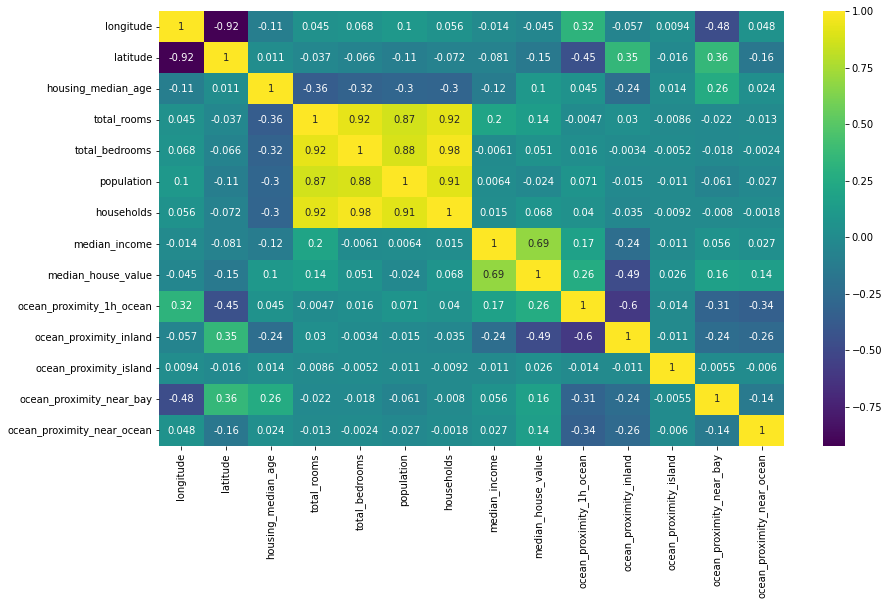

In [11]:
plt.figure(figsize=(14, 8))
corr = train_set.corr()
sns.heatmap(corr, annot=True , cmap='viridis');

In [12]:
corr[['median_house_value']].abs().sort_values(by='median_house_value')

,median_house_value
population,0.024377
ocean_proximity_island,0.026006
longitude,0.044750
total_bedrooms,0.051122
households,0.067993
housing_median_age,0.103696
total_rooms,0.136192
ocean_proximity_near_ocean,0.143914
latitude,0.146057
ocean_proximity_near_bay,0.160160


## **Normalization**

In [13]:
normz = MinMaxScaler()
train_set = normz.fit_transform(train_set)
train_set

array([[0.6185259 , 0.13071201, 0.98039216, ..., 0.        , 0.        ,
        1.        ],
       [0.72808765, 0.01487779, 0.19607843, ..., 0.        , 0.        ,
        1.        ],
       [0.23804781, 0.49734325, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.64840637, 0.13177471, 0.49019608, ..., 0.        , 0.        ,
        0.        ],
       [0.53087649, 0.30499469, 0.78431373, ..., 0.        , 0.        ,
        0.        ],
       [0.53087649, 0.37300744, 0.41176471, ..., 0.        , 0.        ,
        0.        ]])

## **Test Data**

#### **Missing values**

In [14]:
test_set.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        55
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [15]:
test_set['total_bedrooms'].fillna(m, inplace=True)
test_set.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### **Encoding Categorical Features**

In [16]:
test_set.ocean_proximity.unique()

['<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'INLAND', 'ISLAND']
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [17]:
test_set = pd.get_dummies(test_set, columns=['ocean_proximity'], dtype=np.float64)
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
9491,-118.36,34.18,36.0,2233.0,605.0,1934.0,599.0,2.8784,194900.0,1.0,0.0,0.0,0.0,0.0
11843,-117.07,32.69,29.0,1429.0,293.0,1091.0,317.0,3.4609,118000.0,0.0,0.0,0.0,0.0,1.0
11271,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,244900.0,0.0,0.0,0.0,0.0,1.0
19219,-118.29,34.05,18.0,3585.0,1661.0,5229.0,1534.0,1.8470,250000.0,1.0,0.0,0.0,0.0,0.0
14356,-118.38,33.87,23.0,2387.0,418.0,1008.0,415.0,5.8518,337900.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16911,-117.06,34.90,36.0,2828.0,916.0,1762.0,736.0,1.4318,59600.0,0.0,1.0,0.0,0.0,0.0
16881,-117.93,33.86,36.0,1672.0,318.0,1173.0,337.0,4.5774,182100.0,1.0,0.0,0.0,0.0,0.0
956,-116.89,33.79,12.0,701.0,130.0,434.0,110.0,2.0577,56700.0,0.0,1.0,0.0,0.0,0.0
1979,-118.31,34.03,29.0,2438.0,867.0,2114.0,753.0,0.8351,150000.0,1.0,0.0,0.0,0.0,0.0


In [18]:
test_set.columns
test_set.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1h_ocean', 
                        'ocean_proximity_INLAND': 'ocean_proximity_inland',
                        'ocean_proximity_ISLAND': 'ocean_proximity_island', 
                        'ocean_proximity_NEAR BAY': 'ocean_proximity_near_bay',
                        'ocean_proximity_NEAR OCEAN': 'ocean_proximity_near_ocean'}, inplace=True)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_1h_ocean,ocean_proximity_inland,ocean_proximity_island,ocean_proximity_near_bay,ocean_proximity_near_ocean
9491,-118.36,34.18,36.0,2233.0,605.0,1934.0,599.0,2.8784,194900.0,1.0,0.0,0.0,0.0,0.0
11843,-117.07,32.69,29.0,1429.0,293.0,1091.0,317.0,3.4609,118000.0,0.0,0.0,0.0,0.0,1.0
11271,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,244900.0,0.0,0.0,0.0,0.0,1.0
19219,-118.29,34.05,18.0,3585.0,1661.0,5229.0,1534.0,1.8470,250000.0,1.0,0.0,0.0,0.0,0.0
14356,-118.38,33.87,23.0,2387.0,418.0,1008.0,415.0,5.8518,337900.0,1.0,0.0,0.0,0.0,0.0


#### **Normalization**

In [19]:
test_set = normz.fit_transform(test_set)
test_set

array([[0.60427263, 0.17252396, 0.68      , ..., 0.        , 0.        ,
        0.        ],
       [0.73550356, 0.01384452, 0.54      , ..., 0.        , 0.        ,
        1.        ],
       [0.71515768, 0.0628328 , 0.04      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.75381485, 0.13099042, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.6093591 , 0.15654952, 0.54      , ..., 0.        , 0.        ,
        0.        ],
       [0.30417091, 0.57507987, 1.        , ..., 0.        , 0.        ,
        0.        ]])

## **Split Test and Train data To X , y**

In [20]:
X = np.delete(train_set , 8 , axis=1)
y = train_set[: , 8]
X.shape , y.shape

((16512, 13), (16512,))

In [21]:
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size=0.1 , random_state=1)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(14860, 13)
(1652, 13)
(14860,)
(1652,)


In [22]:
X_test = np.delete(test_set , 8 , axis=1)
y_test = test_set[: , 8]
X_test.shape , y_test.shape

((4128, 13), (4128,))

## **Models**

### *LinearRegression*

In [23]:
linear_regression = LinearRegression()
linear_regression.fit(X_train , y_train)
linear_regression.score(X_valid , y_valid)

0.6414581406095712

### *KNeighborsRegressor*

In [24]:
knn_regression = KNeighborsRegressor(n_neighbors=150)
knn_regression.fit(X_train , y_train)
knn_regression.score(X_valid , y_valid)

0.6351064744772404

### *SVM_Regressor*

In [25]:
svm_regression = svm.SVR()
svm_regression.fit(X_train , y_train)
svm_regression.score(X_valid , y_valid)

0.7324156752239723

## **Predictions**

In [26]:
linear_regression_pred = linear_regression.predict(X_test)
knn_regression_pred = knn_regression.predict(X_test)
svm_regression_pred = svm_regression.predict(X_test)

In [32]:
r2_score(y_test , linear_regression_pred)

0.47427285947040654

In [33]:
r2_score(y_test , knn_regression_pred)

0.6218011159941859

In [34]:
r2_score(y_test , svm_regression_pred)

0.6110606684188757

In [35]:
ensemble_prediction = np.vstack((linear_regression_pred , knn_regression_pred , svm_regression_pred)).T
ensemble_prediction = ensemble_prediction.mean(axis=1)
r2_score(y_test , ensemble_prediction)

0.6259417517423884

## **Plots**

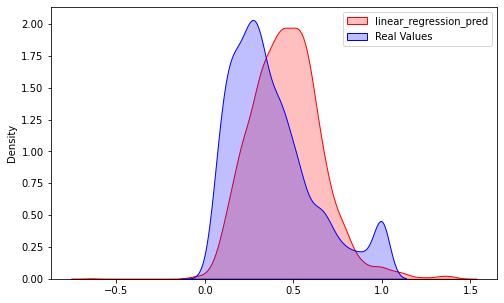

In [28]:
plt.figure(figsize=(8 , 5))
sns.kdeplot(linear_regression_pred , fill=True , label='linear_regression_pred' , color='r');
sns.kdeplot(y_test, fill=True , label='Real Values' , color='b');
plt.legend();

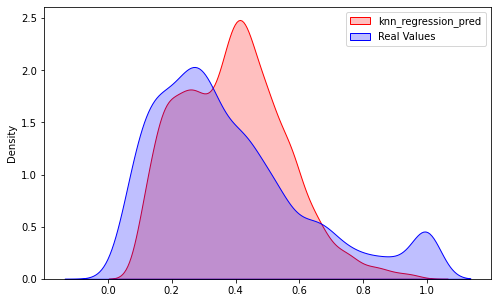

In [29]:
plt.figure(figsize=(8 , 5))
sns.kdeplot(knn_regression_pred , fill=True , label='knn_regression_pred' , color='r');
sns.kdeplot(y_test, fill=True , label='Real Values' , color='b');
plt.legend();

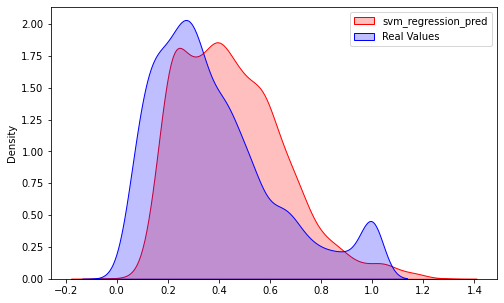

In [30]:
plt.figure(figsize=(8 , 5))
sns.kdeplot(svm_regression_pred , fill=True , label='svm_regression_pred' , color='r');
sns.kdeplot(y_test, fill=True , label='Real Values' , color='b');
plt.legend();

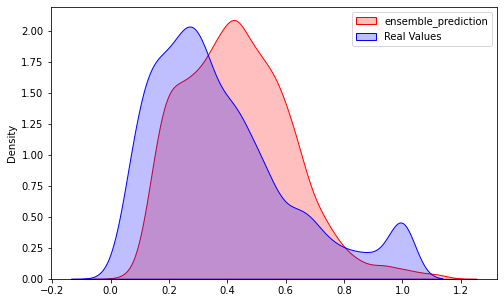

In [31]:
plt.figure(figsize=(8 , 5))
sns.kdeplot(ensemble_prediction , fill=True , label='ensemble_prediction' , color='r');
sns.kdeplot(y_test, fill=True , label='Real Values' , color='b');
plt.legend();